In [1]:
import numpy as np
import matplotlib.pyplot as plt

Imagine you're trying to draw the "best" straight line through a bunch of random points in a graph. This line will help us predict y-values from x-values.

The line equation is: $y = b_1x + b_0$ where: 

- $b_1$ is the slope 

- $b_0$ y-intercept




To find the best line:

- $b_1$ = (change in y)/(change in x)


For y-intercept:

- $b_1$ =  y - (slope × x)

This works if all our data points are exactly on the line that we are trying to determine.

In [2]:
b0 = 5
b1 = 10
x = np.random.random(100)
y = b0 + (b1 * x)
print(y)

[ 5.40391613 13.20057958 13.11986254  9.46291352  5.66981996  7.53466732
 13.05073413 11.62357784  9.12412296  5.65561464  7.82413213 13.36920116
  8.09589999  7.93345962  5.75121324  9.35919297 14.46861308 10.43230718
 12.45646624  8.42585421  8.16573372  9.71168184 12.11026423 14.06478273
  5.59598396  8.00210147  5.55258212  6.93913538  9.54952494  6.5201769
  8.41276233  5.07132606  5.89404749  5.01058289 14.9781918   9.45525
  5.6992589  11.82215333 12.49820085 11.59801908 10.62887383  6.89254861
 11.74425327 11.74844198 12.74799371 10.63908171 10.35038753  8.65524255
 14.66127188  5.48893619 10.6474862  10.66926549  8.66107826 10.7339423
 12.11972569  5.72921823  7.90046697 10.17584033 14.07883661  6.87803414
 11.05288724 10.381244    5.78276218 10.40041368 10.05564137 12.37899667
 11.16744452  9.91046449 13.79411493  9.95760107  8.90101491  6.97326037
  6.41559317  6.58305486  7.45141571  6.52720545 11.53371891  8.46144892
  5.62085057  6.79997195  6.67498852 13.37758068  5.2877

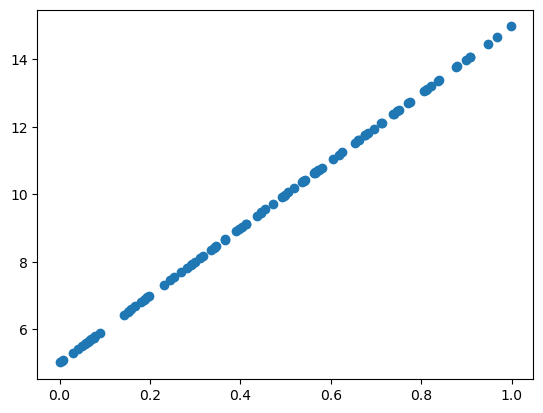

In [3]:
plt.scatter(x, y)

replace the next two cells with
- get a random i, j
- calculate slope: yi - yj/xi - xj
- calculate b0

In [18]:
i = np.random.randint(0, 100)
j = np.random.randint(0, 100)

slope = (i - j) / (i - j)
print(slope)

b0 = i - slope * i
print(b0)

1.0
0.0


In [5]:
b1_new = np.sum((y - np.mean(y)) * x)/np.sum((x - np.mean(x)) * x)
print(b1_new)

10.000000000000002


In [6]:
b0_new = np.mean(y) - (b1 * np.mean(x))
print(b0_new)

5.0


data may not fit a line perfectly as above
How do we deal with a situation where the data is "noisy"

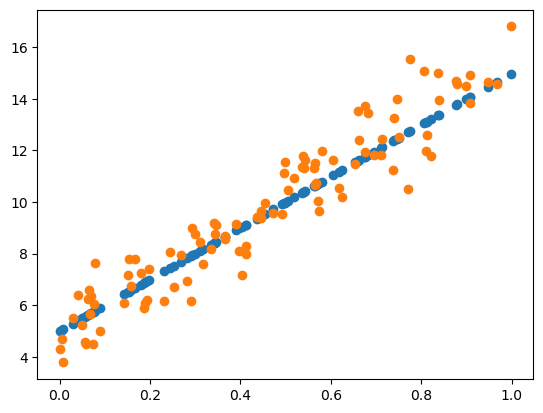

In [7]:
yn = y + np.random.normal(0, 1, 100)
plt.scatter(x, y)
plt.scatter(x, yn)

Soving simple liner regression with noise: 

$ \mathscr{L}= \frac{1}{n} \sum (y - b^Tx)^2$. 

$\frac{\partial\mathscr{L}}{\partial b_0} = \frac{-2}{n} \sum (y - b^Tx) = 0$

$\sum (y - b_0 - b_1x) = 0$

$\frac{1}{n} \sum y - \frac{1}{n} \sum b_0 - \frac{1}{n} \sum b_1x = 0$

- $\frac{1}{n} \sum y $ is the mean 
- $\frac{1}{n} \sum b_0$ is $b_0$ and  
- $\frac{1}{n}\sum b_1x$ is $b_1$ into mean of $x$.

$\bar y - b_0 - b_1\bar x = 0$

therefore,

$b_0 = \bar y - b_1\bar x$




$\frac{\partial\mathscr{L}}{\partial b_1} = \frac{-2}{n} \sum (y - b^Tx)x = 0$

$\sum (y -  b_0 -  b_1x)x = 0$

$\sum (y - \bar y + b_1\bar x - b_1x)x = 0$

$\sum ((y - \bar y) - b_1(x - \bar x))x = 0$

$\sum x (y - \bar y) - b_1\frac{1}{n} \sum x(x - \bar x) = 0$

therefore,

$b_1 = \frac{\sum x (y - \bar y)}{\sum x(x - \bar x)}$




In [8]:
b1_n = np.sum((yn - np.mean(yn)) * x)/np.sum((x - np.mean(x)) * x)
print(b1_n)
b0_n = np.mean(yn) - (b1 * np.mean(x))
print(b0_n)
# Not perfect estimate with the noise

10.770607280805093
5.175144749632869


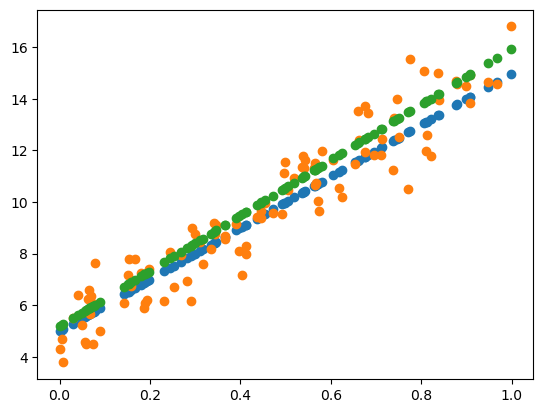

In [9]:
y_est = b0_n + (b1_n * x)
plt.scatter(x, y)
plt.scatter(x, yn)
plt.scatter(x, y_est) # Because of the noise the green line is not equal to the blue line
#plt.plot(x, y_est)


calculate the error between y and y_est

In [10]:
print(b0, b1)

5 10


---

Meshgrid is a way to create a grid of coordinates that lets you evaluate functions over a 2D area.

Imagine you want to:

- Take a range of x-values (0, 1, 2, 3)
- Take a range of y-values ( 0, 1, 2)
and find all possible combinations of these points

Meshgrid creates two arrays:
- One where each row is filled with an x-value
- One where each column is filled with a y-value

Meshgrid builds this grid automatically, making it easy to calculate functions like z = f(x,y) at every point in your grid.

It's useful for:
- Plotting 3D surfaces
- Creating contour plots
- Evaluating functions over a region

Contour plots, which use this meshgrid, are like topographic maps that show you "elevation" or height using lines or colors. Just like how a topographic map shows mountain heights using contour lines, in data visualization these contour plots show where a function has the same value using lines or color gradients.

Together, meshgrid provides the foundation, and contour plots help us visualize how values change across that grid. 

In [11]:

b0r = np.linspace(4.5, 5.5, 100)
b1r = np.linspace(9.5, 10.5, 100)


In [12]:
b0v, b1v = np.meshgrid(b0r, b1r)
print(b0v.shape)
print(b1v.shape)
#converted to indices storing the values of i and j
print(b0v[25,3])
print(b1v[25,3])
#vector product one line to do all the calc
y_v = b0v + (b1v * x)
#cacl y for all the point cal the error and plot it look at it from the top circles


(100, 100)
(100, 100)
4.53030303030303
9.752525252525253


In [19]:
a = np.arange(4).reshape(2, 2)
x = np.arange(3)
#print(a)
#print(x)
b = a.reshape(2, 2, 1)
c = x.reshape(1, 1, 3)
#print(b)
#print(c)
u = b * c
print(u)
print(np.sum(u))

[[[0 0 0]
  [0 1 2]]

 [[0 2 4]
  [0 3 6]]]
18


In [ ]:
b0vr = b0v.reshape(100, 100, 1)
b1vr = b1v.reshape(100, 100, 1)
y_v = b0vr + (b1vr * x)
residue = np.mean(np.square(y - y_v), axis = 2)
print(residue.shape)
print(residue)

(100, 100)
[[0.58656999 0.57147611 0.55658629 ... 0.07257075 0.07727077 0.08217485]
 [0.57810054 0.56310959 0.54832269 ... 0.07408524 0.07888819 0.08389519]
 [0.56969995 0.55481193 0.54012796 ... 0.0756686  0.08057448 0.08568441]
 ...
 [0.08568441 0.08057448 0.0756686  ... 0.54012796 0.55481193 0.56969995]
 [0.08389519 0.07888819 0.07408524 ... 0.54832269 0.56310959 0.57810054]
 [0.08217485 0.07727077 0.07257075 ... 0.55658629 0.57147611 0.58656999]]


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

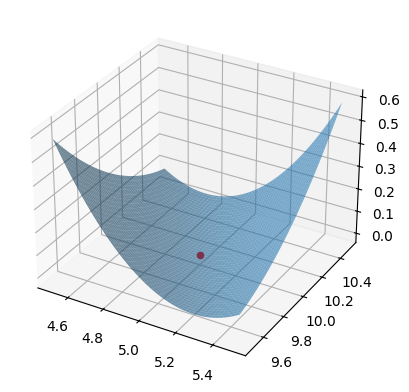

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(b0v, b1v, residue, alpha = 0.6)
ax.scatter(b0, b1, 0, c = 'r')
#The red dot shows the minimum

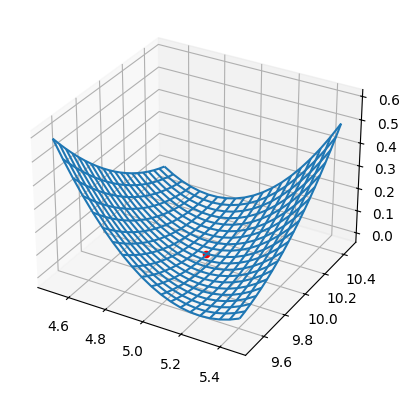

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_wireframe(b0v[::5, ::5], b1v[::5, ::5], residue[::5, ::5])
ax.scatter(b0, b1, 0, c = 'r')
# Make it look more like a mesh so that its easier to see the min

In [ ]:
print(y[:10])
print(y_v[0,0,:10])

[14.46530886 13.08477577  6.52309667  6.80738696  6.46296963 10.41130031
 14.26694196  7.70468309  9.21969579  5.49946471]
[8.75938899 8.1381491  5.1853935  5.31332413 5.15833633 6.93508514
 8.67012388 5.71710739 6.39886311 4.72475912]


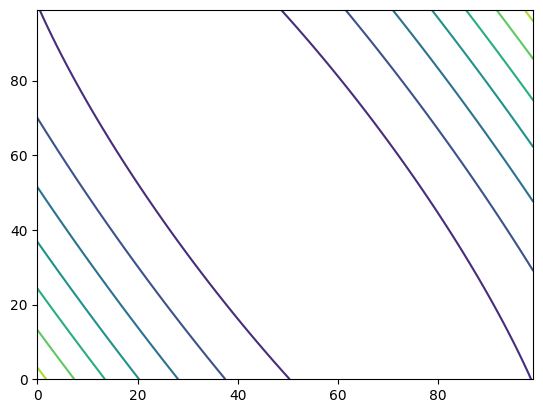

In [ ]:
#These are contour plots and differents ways you can use contour plots to visualize
plt.contour(residue)

[0.   0.08 0.16 0.24 0.32 0.4  0.48 0.56 0.64]


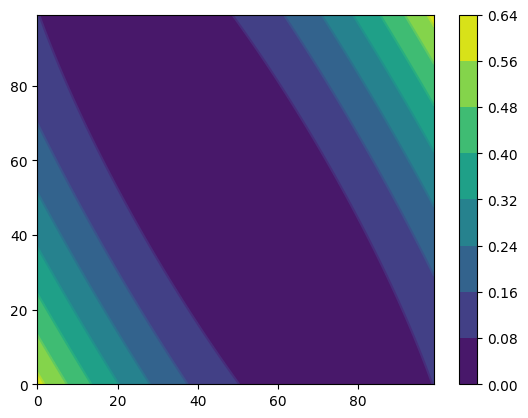

In [ ]:
plt.contourf(residue)
plt.colorbar()
c = plt.contour(residue)
print(c.levels)

<a list of 12 text.Text objects>

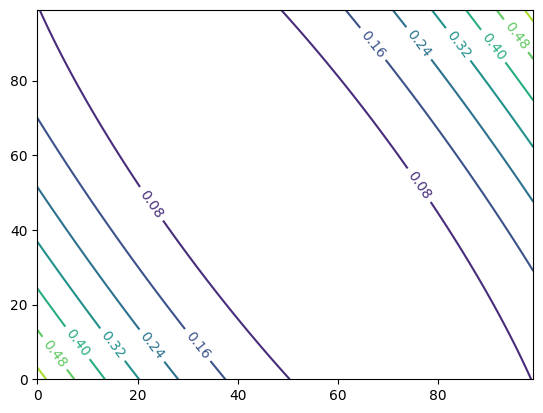

In [ ]:
c = plt.contour(residue)
plt.clabel(c, levels = c.levels)